- Unlike Thompson sampling which is a probabilistic algorithm meaning that the success rate distribution of the bandits was calculated based on the probability distribution, UCB is a deterministic algorithm meaning that there is no factor of uncertainty or probability.
- We will use the MultiArmed Bandit Problem(MABP) to understand UCB.
- UCB is a deterministic algorithm for Reinforcement Learning that focuses on exploration and exploitation based on a confidence boundary that the algorithm assigns to each machine on each round of exploration(A round is when a player pulls the arm of a machine)
- This strategy is based on the Optimism in the Face of Uncertainty principle, and assumes that the unknown mean payoffs of each arm  will be as high as possible, based on observable data.

# The Intuition Behind UCB
Step 1:
- Each ad is assumed to have a uniform Confidence Interval and a success distribution. 
- This Confidence Interval is a margin of success rate distributions which is the most certain to consist of the actual success rate distribution of each machine which we are unaware of in the beginning.

Step 2:
- An ad is randomly chosen, as initially, they have all the same confidence Intervals.

Step 3: 
- Based on whether the ad gave a reward or not, the Confidence Interval shifts either towards or away from the actual success distribution and also converges or shrinks as it has been explored, resulting in the Upper bound value of the confidence Interval to also be reduced.

Step 4:
- Based on the current Upper Confidence bounds of each of the ads, the one with the highest is chosen to explore in the next round.

Step 5: 
- Steps 3 and 4 are repeated continuously until there are sufficient observations to determine the upper confidence bound of each machine. 
- The one with the highest upper confidence bound is the machine with the highest success rate.

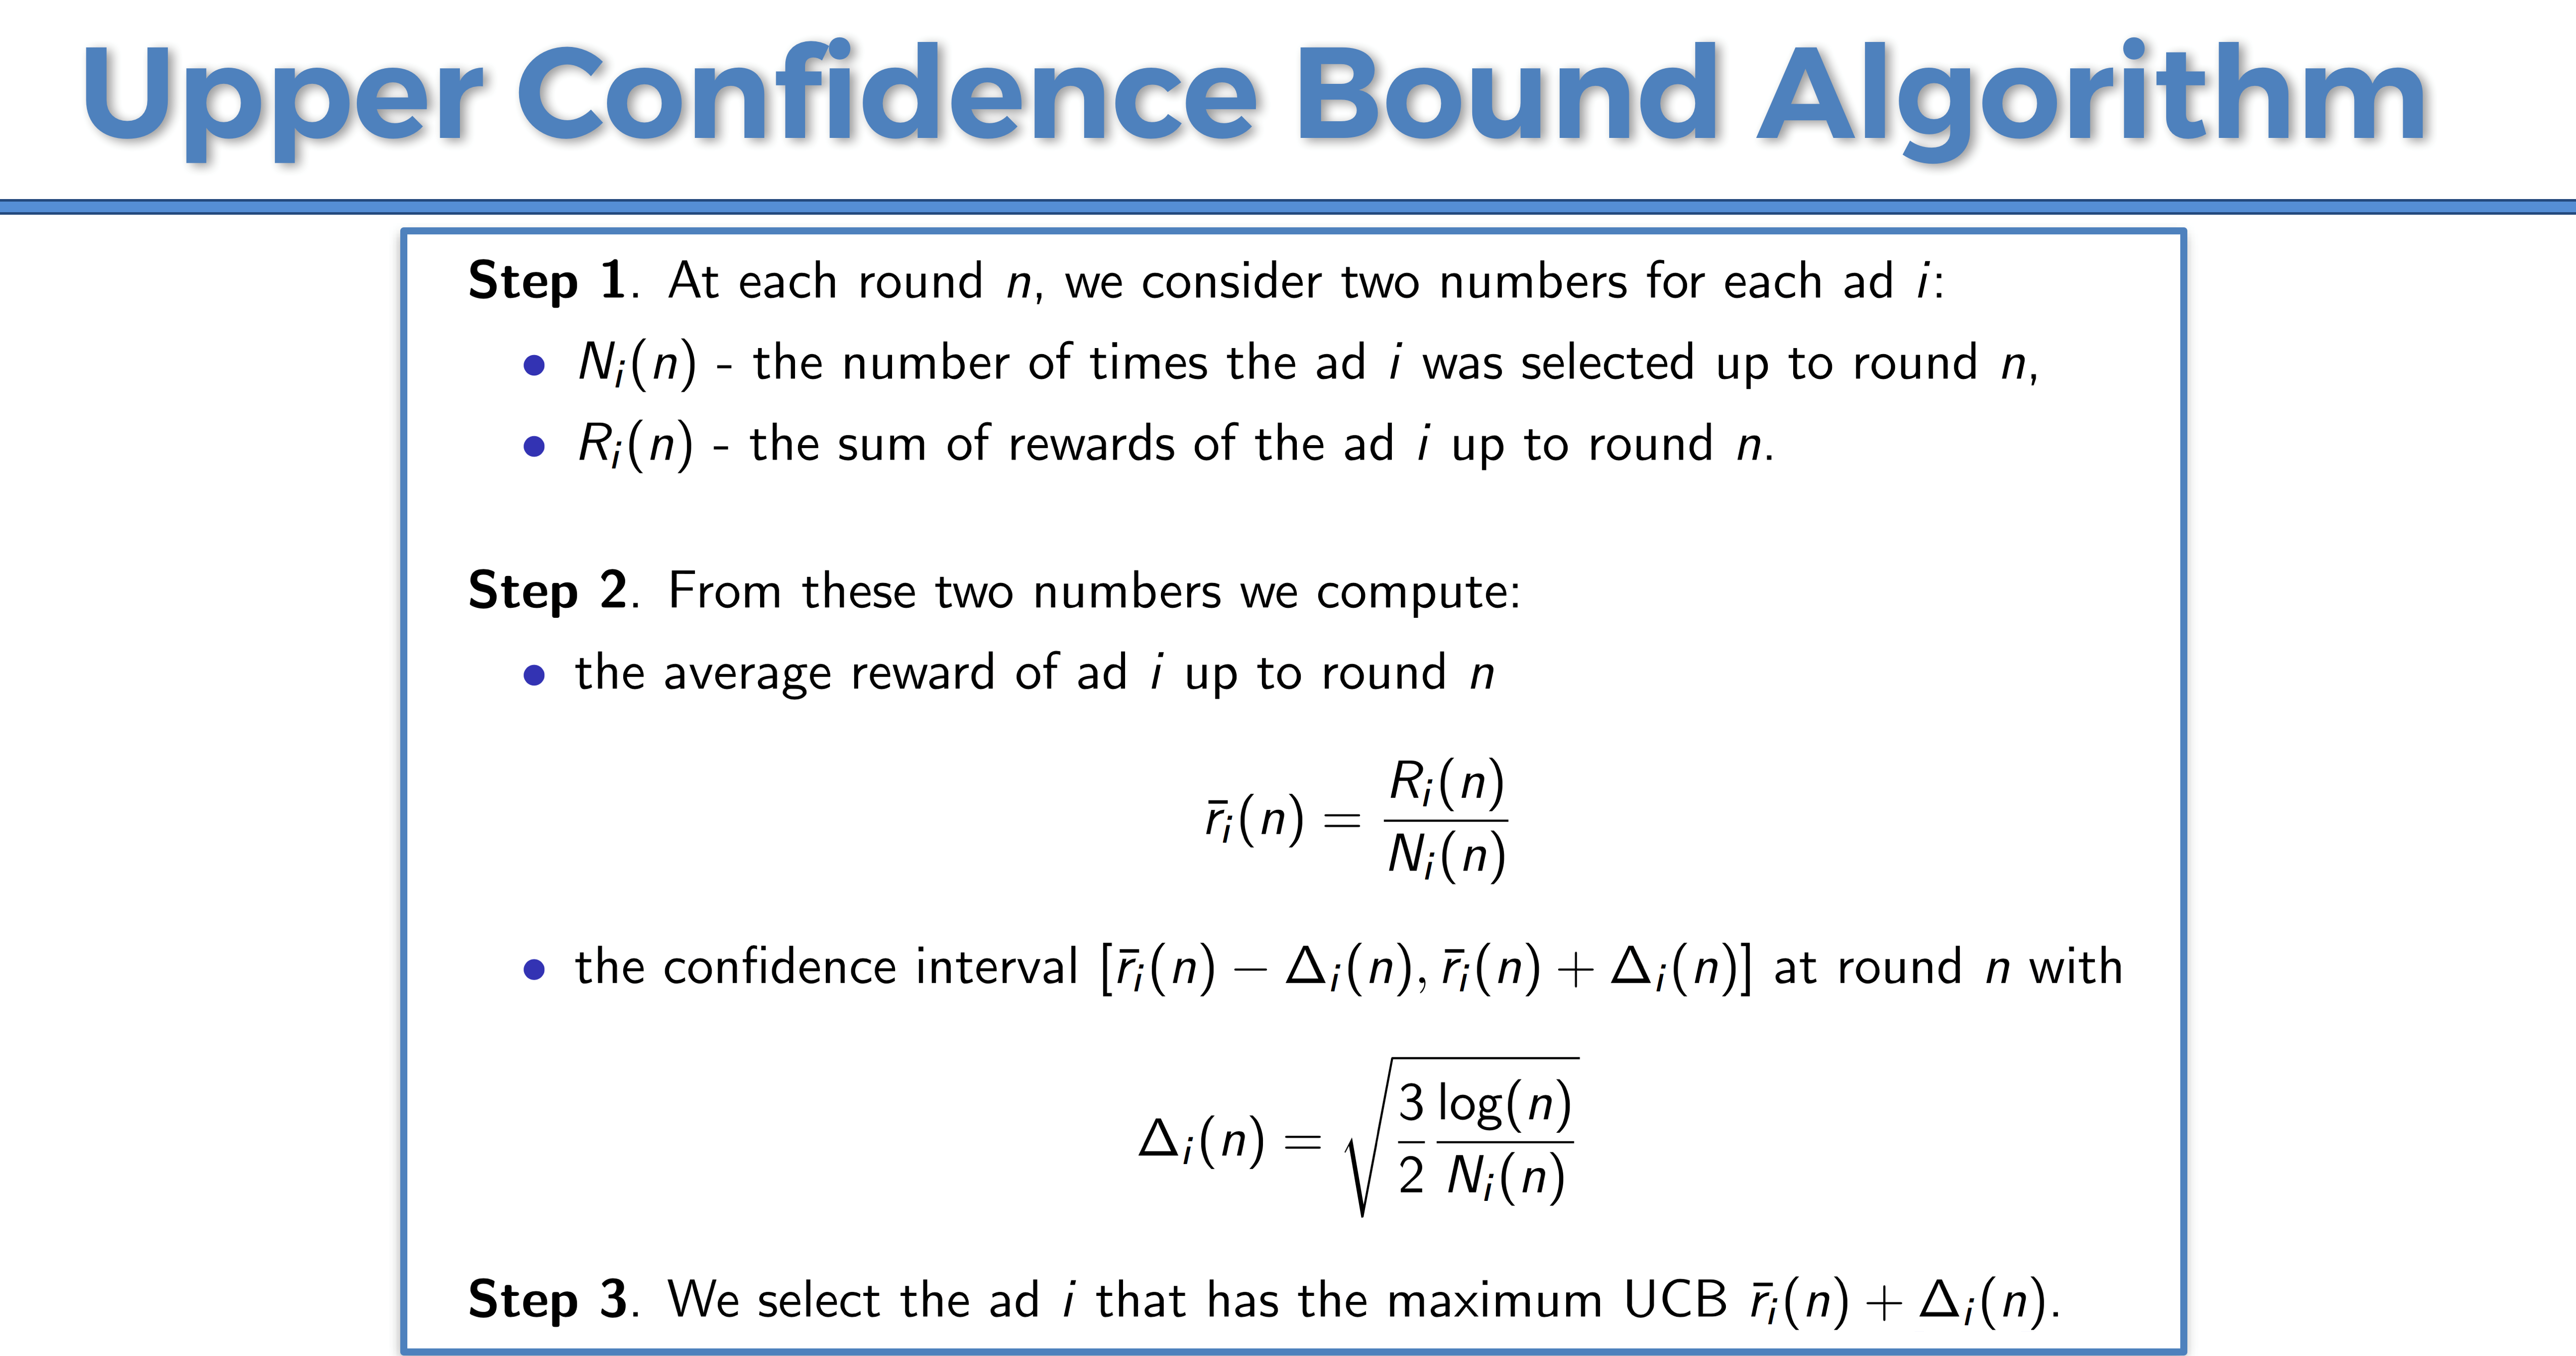

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Ads_CTR_Optimisation.csv to Ads_CTR_Optimisation.csv


In [5]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing the UCB
- Since we have to iterate through each observation of each of the ads, we start by initializing the number of observations and machines.

In [6]:
N = data.shape[0]
d = data.shape[1]

Two variables are considered for each round of exploration of a machine:
- The number of times each machine has been selected till round n
- The sum of rewards collected by each machine till round n

In [7]:
num_selections = [0] * d
sum_rewards = [0] * d

We also define two variables
- one to store the sequence of the machines that are selected at each round
- another to store the total rewards produced by the algorithm.

In [8]:
ads_selected = []
total_rewards = 0

The Algorithm:
- We iterate over each ad in each observation starting with index 0 and with a maximum upper bound value of zero.
- At each round, we check if an ad has been selected before or not. 
    - If yes, the algorithm proceeds to calculate the average rewards of the ad, the delta and the upper confidence. 
    - If not, i.e if the ad is being selected for the first time then it sets a default upper bound value of 1e400.
- After each round, the machine with the highest upper bound value is selected, the number of selections along with the actual reward and sum of rewards for the selected machine is updated.
- After all the rounds are completed, we have a machine with a maximum upper bound value.

In [9]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0

    for i in range(0, d):
        if (num_selections[i] > 0):
            average_reward = sum_rewards[i] / num_selections[i]
            delta_i = np.sqrt(3 / 2 * np.log(n + 1) / num_selections[i])
            upper_bound = average_reward + delta_i

        else:
            upper_bound = 1e400

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    num_selections[ad] = num_selections[ad] + 1
    reward = data.values[n, ad]
    sum_rewards[ad] = sum_rewards[ad] + reward
    total_rewards = total_rewards + reward

Visualizing the results

In [10]:
print(f"Rewards By Machine = {sum_rewards}")
print(f"Total Rewards by UCB = {total_rewards}")
print(f"Machine Selected At Each Round By UCB : {ads_selected}")

Rewards By Machine = [120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
Total Rewards by UCB = 2178
Machine Selected At Each Round By UCB : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3

Visualising the rewards of each machine

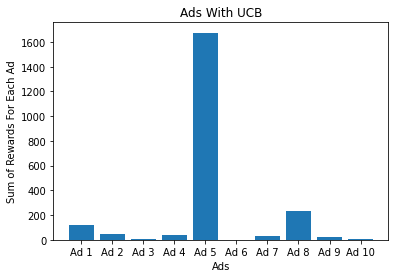

In [12]:
plt.bar(data.columns, sum_rewards)
plt.title('Ads With UCB')
plt.xlabel('Ads')
plt.ylabel('Sum of Rewards For Each Ad')
plt.show()

Visualising the selections of each machine

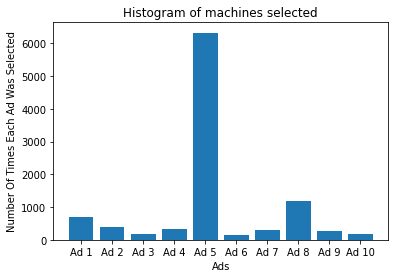

In [14]:
plt.bar(data.columns, num_selections)
plt.title('Histogram of machines selected')
plt.xlabel('Ads')
plt.ylabel('Number Of Times Each Ad Was Selected')
plt.show()